In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #seaborn for image generation
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

import os
for dirname, _, filenames in os.walk(r"C:\Users\chiya\Desktop"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\chiya\Desktop\Arduino IDE.lnk
C:\Users\chiya\Desktop\Autodesk Fusion 360.lnk
C:\Users\chiya\Desktop\card_transdata.csv
C:\Users\chiya\Desktop\CodeBlocks.lnk
C:\Users\chiya\Desktop\creditcard.csv
C:\Users\chiya\Desktop\desktop.ini
C:\Users\chiya\Desktop\Screenshot 2024-08-22 090445.png
C:\Users\chiya\Desktop\Visual Studio Code.lnk


## Importing libraries 

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
!pip install imblearn
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics

Defaulting to user installation because normal site-packages is not writeable


In [37]:
# reading the dataset
df=pd.read_csv(r'C:\Users\chiya\Desktop\card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Data Exploration

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [39]:
print("Columns:",df.shape[0],"Rows:",df.shape[1])

Columns: 1000000 Rows: 8


In [40]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# ratio_median_purchase_price is correlated with fraud

corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


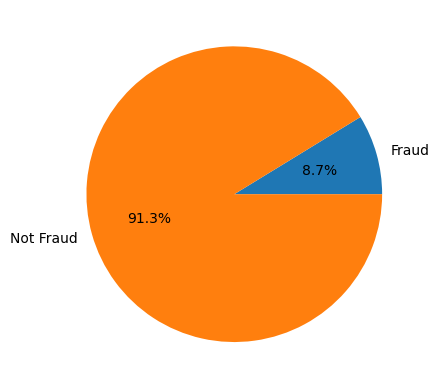

In [42]:
f_count = df[df["fraud"] == 1]["fraud"].count()
nf_count = df[df["fraud"] == 0]["fraud"].count()
plt.pie([f_count,nf_count],labels=['Fraud','Not Fraud'],autopct='%1.1f%%')
plt.show()

The pie chart above indicates that the dataset is extremely unbalanced, which is expected in this particular use case

## Data pre-processing

In [43]:
# no mising values
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [44]:
# no duplicate values
df[df.duplicated()]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [45]:
# splitting target
x = df.drop("fraud", axis = 1).values
y = df["fraud"].astype("int8").values

In [46]:
#splitting data train, test
target = ['fraud']
predictors = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2018, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=2018, shuffle=True )
X_train = train_df[predictors]
y_train = train_df[target]
X_test = test_df[predictors]
y_test = test_df[target]
# X_train,X_test,y_train,y_test=train_test_split(x,y,test_size = 0.2, stratify = y)


# standarization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# oversampling
smote = SMOTE(random_state=39)
X_over,y_over  = smote.fit_resample(X_train,y_train)


## Random Forest Classifier   

In [47]:
clf1 = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [48]:
clf1.fit(train_df[predictors], train_df[target].values)
preds = clf1.predict(valid_df[predictors])

C:\Users\chiya\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\chiya\AppData\Local\Temp\ipykernel_5952\2657502188.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


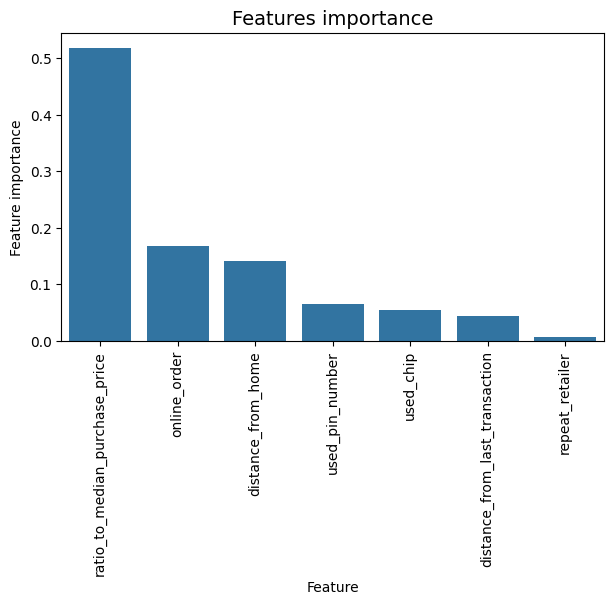

In [49]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf1.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [50]:
y_pred_clf1 = clf1.predict(X_test)
print(classification_report(y_test, y_pred_clf1, digits=6))

C:\Users\chiya\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0   0.918192  0.998280  0.956563    182554
         1.0   0.793828  0.069300  0.127471     17446

    accuracy                       0.917245    200000
   macro avg   0.856010  0.533790  0.542017    200000
weighted avg   0.907344  0.917245  0.884241    200000



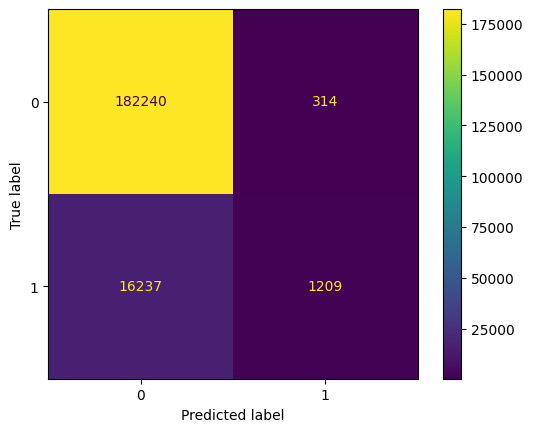

In [51]:
confusion_matrix_clf1 = confusion_matrix(y_test, y_pred_clf1)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_clf1)
disp.plot()

plt.show()

In [52]:
roc_auc_score(valid_df[target].values, preds)

0.9999632515066883

## Decision Tree Classifier

In [56]:
# Hyper parameter tuning (GridSearchCV)
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [57]:
grid_search.fit(X_over,y_over)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1', verbose=1)

In [58]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [59]:
clf = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5)
clf = clf.fit(X_over,y_over)

In [60]:
# testing
y_pred_clf = clf.predict(X_test)

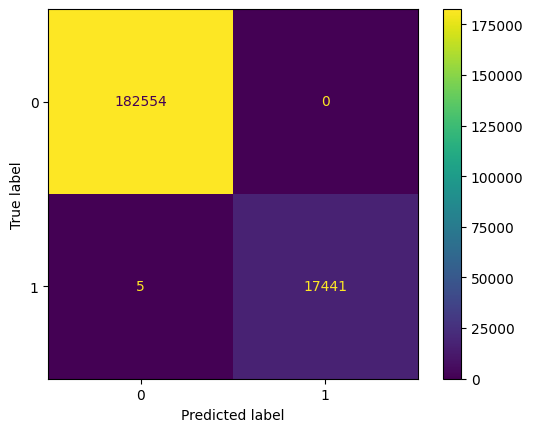

In [61]:
confusion_matrix_clf = confusion_matrix(y_test, y_pred_clf)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_clf)
disp.plot()

plt.show()

In [62]:
print(classification_report(y_test, y_pred_clf, digits=6))

              precision    recall  f1-score   support

         0.0   0.999973  1.000000  0.999986    182554
         1.0   1.000000  0.999713  0.999857     17446

    accuracy                       0.999975    200000
   macro avg   0.999986  0.999857  0.999921    200000
weighted avg   0.999975  0.999975  0.999975    200000



In [63]:
importance = clf.feature_importances_

# feature importance
column_names=df.columns[:-1].to_list()
for i,v in zip((importance),column_names):
    print(f'{v} : {i}')

distance_from_home : 0.26395787041615526
distance_from_last_transaction : 0.11208860183510849
ratio_to_median_purchase_price : 0.5158598757387391
repeat_retailer : 0.01399087153273989
used_chip : 0.023100728516369504
used_pin_number : 0.016294419106524974
online_order : 0.05470763285436271


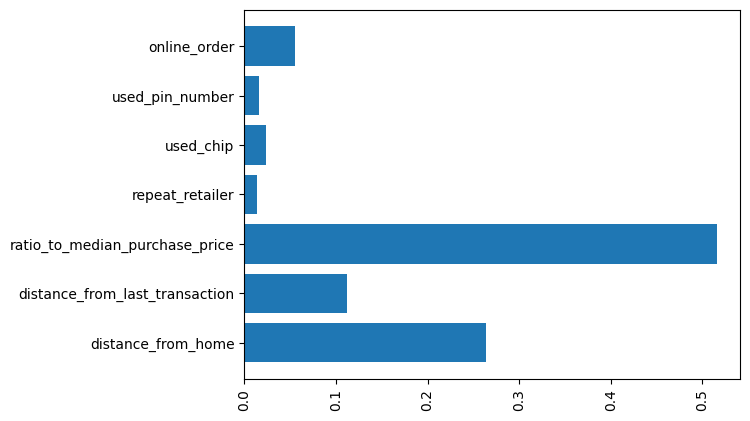

In [64]:
plt.barh(column_names,importance)
plt.xticks(rotation=90)
plt.show()

## Logistic Regression

In [65]:
grid={"C":np.logspace(-3,3,7)}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=4,n_jobs=-1, verbose=1, scoring = "f1")
logreg_cv.fit(X_over,y_over)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


C:\Users\chiya\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='f1', verbose=1)

In [66]:
logreg_cv.best_estimator_

LogisticRegression(C=0.01)

In [68]:
clf2=LogisticRegression(C=0.1)
clf2 = clf2.fit(X_over,y_over)
y_pred_clf2 = clf2.predict(X_test)


C:\Users\chiya\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


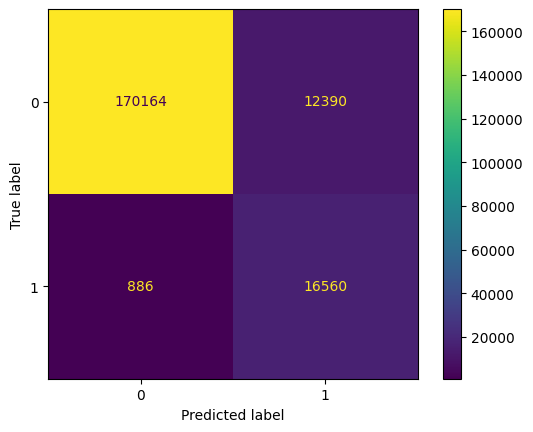

In [69]:
confusion_matrix_clf = confusion_matrix(y_test, y_pred_clf2)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_clf)
disp.plot()

plt.show()

In [70]:
print(classification_report(y_test, y_pred_clf2, digits=6))

              precision    recall  f1-score   support

         0.0   0.994820  0.932130  0.962455    182554
         1.0   0.572021  0.949215  0.713855     17446

    accuracy                       0.933620    200000
   macro avg   0.783420  0.940672  0.838155    200000
weighted avg   0.957939  0.933620  0.940770    200000



In [71]:
importance = clf2.coef_[0]
# feature importance
column_names=df.columns[:-1].to_list()
for i,v in zip((importance),column_names):
    print(f'{v} : {i}')

distance_from_home : 1.9183077579173866
distance_from_last_transaction : 1.3106970803213107
ratio_to_median_purchase_price : 3.3817985566779445
repeat_retailer : -0.47130111551696324
used_chip : -0.5673708817677495
used_pin_number : -2.947186921538815
online_order : 2.3568580830015042


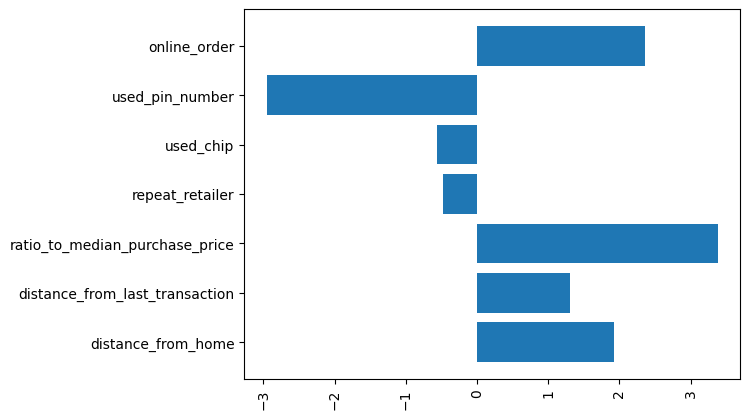

In [72]:
plt.barh(column_names,importance)
plt.xticks(rotation=90)
plt.show()

## Conclusion & Discussion

### Result Discussion:
Decision trees outperformed Logistic regression in this particular setting , which might be due to the fact that Decision trees are less sensetive to noisy data and outliers

### Strengths:
- The proposed approached seems to be giving promising results while not requiring any extensive finetuning or high computation
- It has performed well across various metrics 
- The model itself is extremly fast in inference , which would prove viable in real time scenarios

### Limitations:
- The model , although performed well , can still perform terribly in real life scenarios ,if the dataset itself is not representative enough of those scenarios
- If criminals somehow get to know the features involved into making the Algorithm , they can take extra steps to find loopholes

### Data driven recommendations:
- Ensure high quality,representative Data
- Implement the pipeline in such a way to keep training the model even after deployment 
- Always check for state of the art and literrature review to stay updated with latest technological advancements 

### Sources:
- [1]https://machinelearningmastery.com/calculate-feature-importance-with-python/